(c) 2016 - present. Enplus Advisors, Inc.

# Programming with Data:<br>Advanced Python and Pandas<br><br>Time Series

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.precision', 2)

np.random.seed(252)

def random_series(dts):
    res = pd.Series(np.random.randn(len(dts)), index=dts)
    return res

def image(name, **kwargs):
    from IPython.display import Image
    return Image(filename=f'assets/{name}', retina=True, **kwargs)

## Time Series

No new classes for Series and DataFrame. 

A "timeseries" is a `Series` or `DataFrame` with a `DatetimeIndex`
or `PeriodIndex`

### Create a simple time series

* Standard datetime import
* Create a scalar time series
* Show the new type of index - note no `freq`

In [2]:
ts = pd.Timestamp('2000-01-01 00:00')

In [3]:
s1 = pd.Series(101.7, index=[ts])
s1

2000-01-01    101.7
dtype: float64

In [4]:
s1.index

DatetimeIndex(['2000-01-01'], dtype='datetime64[ns]', freq=None)

## Time Series Utility Functions

In [5]:
# Create a year's worth of weekdays
dts = pd.date_range('2000-01-01', '2001-12-31', freq='B')
ts = pd.Series(np.random.randn(len(dts)), index=dts)
ts.head()

2000-01-03   -0.01
2000-01-04   -0.09
2000-01-05    0.08
2000-01-06   -1.65
2000-01-07   -0.75
Freq: B, dtype: float64

## Selecting from a Time Series

Notice how the slicing selects across non-contiguous dates.

In [6]:
ts['2000-03-20'] # ts.loc['2000-03-20']

1.3091432326146675

In [7]:
ts['2000-03-24':'2000-03-30']

2000-03-24    0.36
2000-03-27   -0.82
2000-03-28    0.11
2000-03-29    1.36
2000-03-30   -0.49
Freq: B, dtype: float64

### Select by month

In [8]:
ts['2000-02'].head()

2000-02-01    1.16
2000-02-02    2.18
2000-02-03   -0.29
2000-02-04    1.28
2000-02-07    0.57
Freq: B, dtype: float64

### Select by year

In [9]:
ts['2000'].head()

2000-01-03   -0.01
2000-01-04   -0.09
2000-01-05    0.08
2000-01-06   -1.65
2000-01-07   -0.75
Freq: B, dtype: float64

## Leading and Lagging

* Common time series operation
* Useful for calculating things differences, percent change over time

### Lagging

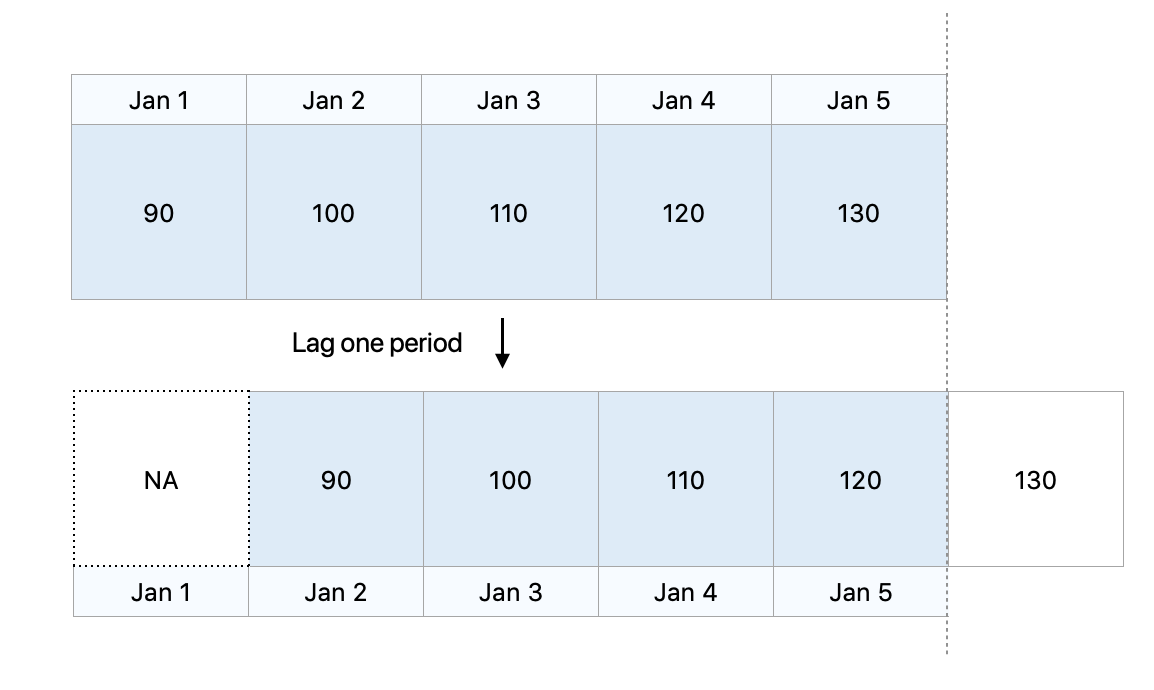

In [10]:
image('lag.png')

#### Lagging using position

In [11]:
ts2k = ts['2000-01'].copy()
ts2k.shift(1).iloc[[0, 1, 2, -2, -1]] # show first and last few rows

2000-01-03     NaN
2000-01-04   -0.01
2000-01-05   -0.09
2000-01-28   -1.72
2000-01-31   -0.86
dtype: float64

Notice that the `index` is constant. We drop the first value.

### Leading data

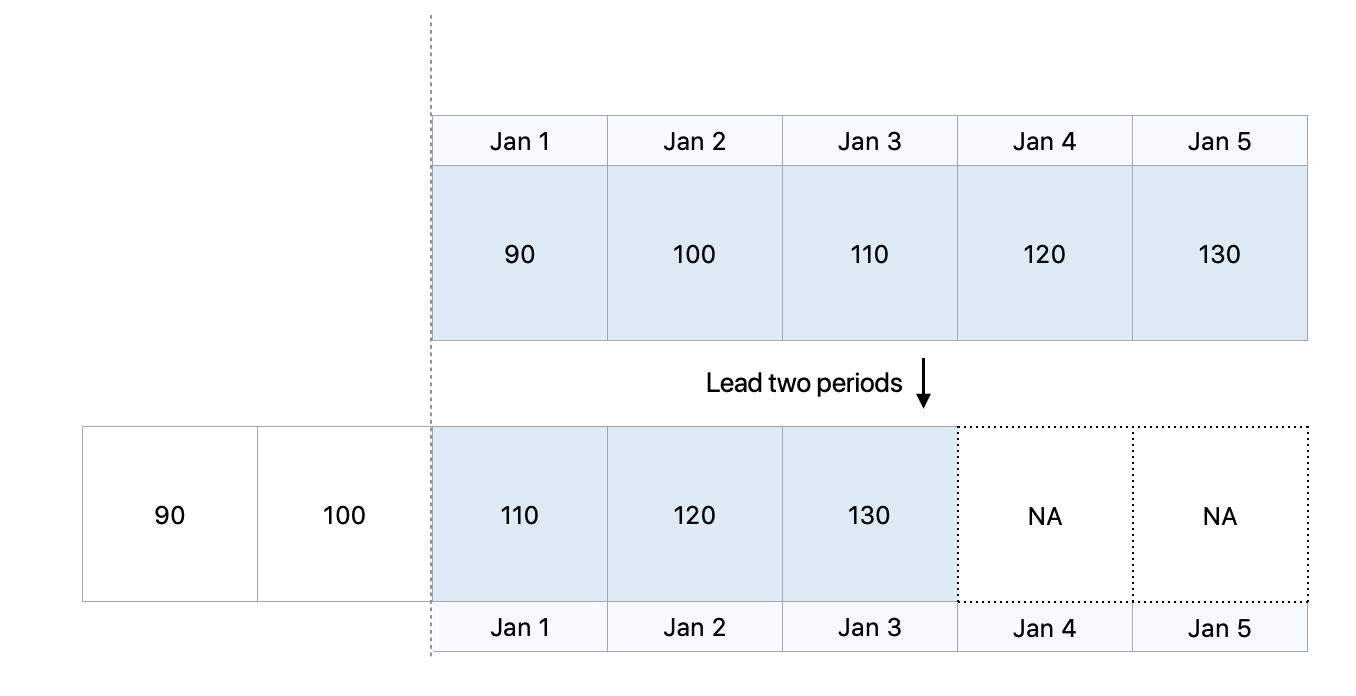

In [12]:
image('lead.png')

TODO: Add example here of lead/lag to calculate a percentage difference

## Changing Frequencies: Resampling

Resampling is similar to grouping, expect with time and notions of
forwards and backwards.

In [13]:
dts1 = pd.date_range('2000-01-01', '2000-03-31', freq='D')
ts3 = pd.Series(np.random.randn(len(dts1)), index=dts1)

In [14]:
grp = ts3.resample('M')

### Resampling is like grouping

In [15]:
grp.mean()

2000-01-31   -0.21
2000-02-29   -0.02
2000-03-31    0.21
Freq: M, dtype: float64

In [16]:
grp.agg(
    monthly_mean='mean',
    monthly_std='std')

monthly_mean  monthly_std
2000-01-31         -0.21         0.89
2000-02-29         -0.02         1.05
2000-03-31          0.21         0.97

## Filling Missing Data 

In [17]:
def make_series_4():
    dts = pd.date_range('2000-01-02', '2000-01-07', freq='D')
    rv = pd.Series(np.random.randn(len(dts)), index=dts)
    rv.iloc[[0, 2, 5]] = np.nan
    return rv

ts4 = make_series_4()
ts4

2000-01-02     NaN
2000-01-03    1.30
2000-01-04     NaN
2000-01-05   -1.45
2000-01-06    1.00
2000-01-07     NaN
Freq: D, dtype: float64

### Filling Data Forward

In [18]:
ts4.ffill()

2000-01-02     NaN
2000-01-03    1.30
2000-01-04    1.30
2000-01-05   -1.45
2000-01-06    1.00
2000-01-07    1.00
Freq: D, dtype: float64

### Filling Data Backwards

In [19]:
ts4.bfill()

2000-01-02    1.30
2000-01-03    1.30
2000-01-04   -1.45
2000-01-05   -1.45
2000-01-06    1.00
2000-01-07     NaN
Freq: D, dtype: float64

### Filling with limits

In [20]:
def make_series_5():
    dts = pd.date_range('2000-01-01', '2000-01-05', freq='D')
    rv = pd.Series(np.random.randn(len(dts)), index=dts)
    rv[1:] = np.nan
    return rv

ts5 = make_series_5()
ts5

2000-01-01    1.33
2000-01-02     NaN
2000-01-03     NaN
2000-01-04     NaN
2000-01-05     NaN
Freq: D, dtype: float64

### Filling with limits (cont)

In [21]:
ts5.ffill(limit=2)

2000-01-01    1.33
2000-01-02    1.33
2000-01-03    1.33
2000-01-04     NaN
2000-01-05     NaN
Freq: D, dtype: float64

## Aligning Dates

### Sample Data

Create a weekly and monthly series.

In [22]:
dts_w = pd.bdate_range('2000-01-01', periods=8, freq='W')
sp5_weekly = random_series(dts_w)

dts_m = pd.bdate_range('2000-01', periods=2, freq='MS')
t_bill = pd.Series([0.012, 0.023], index=dts_m)

### View the data

In [23]:
sp5_weekly

2000-01-02   -1.35
2000-01-09   -0.19
2000-01-16   -1.16
2000-01-23   -0.61
2000-01-30   -1.12
2000-02-06   -2.07
2000-02-13   -0.50
2000-02-20   -0.20
Freq: W-SUN, dtype: float64

In [24]:
t_bill

2000-01-01    0.01
2000-02-01    0.02
Freq: MS, dtype: float64

### Using `reindex`

In [25]:
t_bill.reindex(sp5_weekly.index)

2000-01-02   NaN
2000-01-09   NaN
2000-01-16   NaN
2000-01-23   NaN
2000-01-30   NaN
2000-02-06   NaN
2000-02-13   NaN
2000-02-20   NaN
Freq: W-SUN, dtype: float64

### Reindex and fill forward

In [26]:
t_bill.reindex(sp5_weekly.index, method='ffill')

2000-01-02    0.01
2000-01-09    0.01
2000-01-16    0.01
2000-01-23    0.01
2000-01-30    0.01
2000-02-06    0.02
2000-02-13    0.02
2000-02-20    0.02
Freq: W-SUN, dtype: float64

## Rolling Calculations

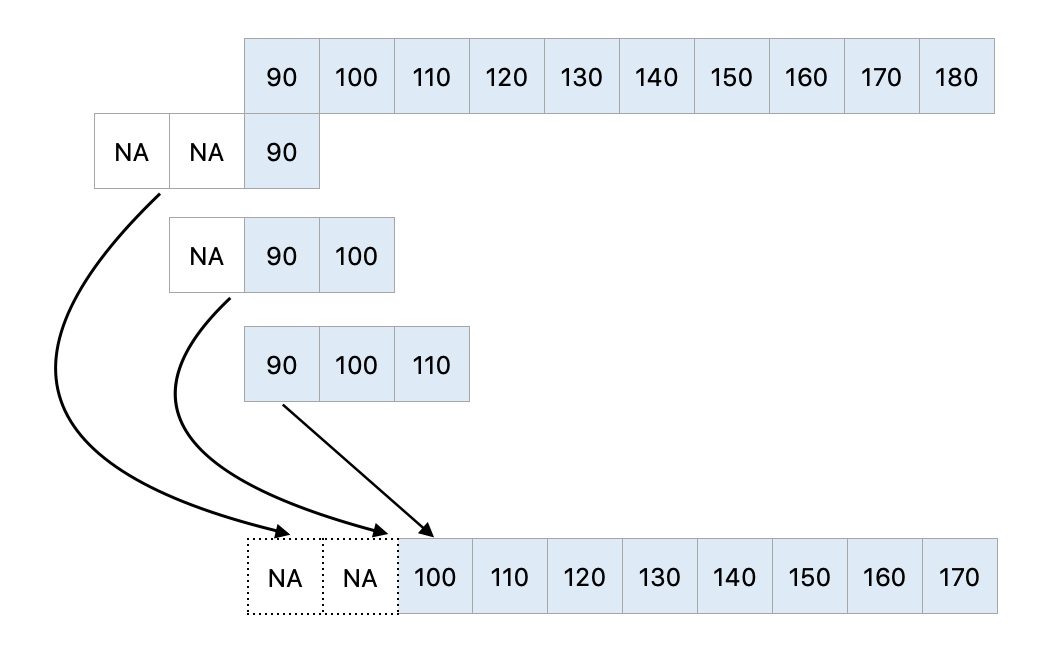

In [27]:
image('rolling.png')

### Rolling example

In [28]:
roll = sp5_weekly.rolling(2)

In [29]:
roll.mean()

2000-01-02     NaN
2000-01-09   -0.77
2000-01-16   -0.67
2000-01-23   -0.88
2000-01-30   -0.86
2000-02-06   -1.60
2000-02-13   -1.28
2000-02-20   -0.35
Freq: W-SUN, dtype: float64